**Importing the necessary python libraries**

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
sns.set()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**`Import the dataset `**

In [13]:
from google.colab import files
data= files.upload()

Saving Health Systems Dataset.csv to Health Systems Dataset (1).csv


**Data analysis and cleaning of data**

Gain more insight on the data



In [14]:
df = pd.read_csv ("Health Systems Dataset.csv")
df.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


**Check for null values in the different columns**


In [15]:
df.isnull().sum()

Country_Region                           23
Province_State                          196
World_Bank_Name                           0
Health_exp_pct_GDP_2016                  24
Health_exp_public_pct_2016               24
Health_exp_out_of_pocket_pct_2016        24
Health_exp_per_capita_USD_2016           24
per_capita_exp_PPP_2016                  24
External_health_exp_pct_2016             43
Physicians_per_1000_2009-18              21
Nurse_midwife_per_1000_2009-18           21
Specialist_surgical_per_1000_2008-18     35
Completeness_of_birth_reg_2009-18        47
Completeness_of_death_reg_2008-16       103
dtype: int64

**Calculate percentage of null values in the different columns**

In [16]:
df.isnull().sum() /210 * 100

Country_Region                          10.952381
Province_State                          93.333333
World_Bank_Name                          0.000000
Health_exp_pct_GDP_2016                 11.428571
Health_exp_public_pct_2016              11.428571
Health_exp_out_of_pocket_pct_2016       11.428571
Health_exp_per_capita_USD_2016          11.428571
per_capita_exp_PPP_2016                 11.428571
External_health_exp_pct_2016            20.476190
Physicians_per_1000_2009-18             10.000000
Nurse_midwife_per_1000_2009-18          10.000000
Specialist_surgical_per_1000_2008-18    16.666667
Completeness_of_birth_reg_2009-18       22.380952
Completeness_of_death_reg_2008-16       49.047619
dtype: float64

**Since Province State has the most null values it doesn't contribute hugely to our classification model.Therefore, it is dropped**






In [17]:
del df['Province_State']



**Identify a method to fill in the null values. In this case, columns with numerical data missing are replaced with the mean value.**

In [18]:
df.fillna(df.mean(),inplace=True)
df

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,Afghanistan,10.200000,5.100000,77.400000,57.200000,162.800000,17.500000,0.30000,0.300000,0.000000,42.300000,89.309346
1,Albania,Albania,6.700000,41.400000,58.000000,271.500000,759.700000,0.700000,1.20000,3.600000,11.600000,98.400000,53.000000
2,Algeria,Algeria,6.600000,67.700000,30.900000,260.400000,998.200000,0.000000,1.80000,2.200000,12.100000,100.000000,89.309346
3,Andorra,Andorra,10.400000,49.100000,41.700000,3834.700000,4978.700000,9.116766,3.30000,4.000000,83.100000,100.000000,80.000000
4,Angola,Angola,2.900000,44.100000,35.200000,95.200000,185.800000,3.600000,0.20000,1.300000,37.937143,25.000000,89.309346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,US,Virgin Islands (U.S.),6.715054,52.915054,32.661828,1037.004839,1412.466667,9.116766,1.72328,4.139153,37.937143,84.202454,89.309346
206,NaN,West Bank and Gaza,6.715054,52.915054,32.661828,1037.004839,1412.466667,9.116766,1.72328,4.139153,37.937143,96.000000,89.309346
207,NaN,"Yemen, Rep.",5.600000,10.200000,81.000000,72.000000,144.500000,7.800000,0.30000,0.700000,0.800000,30.700000,89.309346
208,Zambia,Zambia,4.500000,38.300000,12.100000,56.500000,175.200000,42.500000,0.10000,0.900000,1.500000,11.300000,89.309346


**Since World Bank Name had all values, that column can be used to fill in missing values in the country region column by masking**

In [19]:
df['Country_Region']= df['Country_Region'].mask(pd.isnull, df['World_Bank_Name'])
df.isnull().sum()


Country_Region                          0
World_Bank_Name                         0
Health_exp_pct_GDP_2016                 0
Health_exp_public_pct_2016              0
Health_exp_out_of_pocket_pct_2016       0
Health_exp_per_capita_USD_2016          0
per_capita_exp_PPP_2016                 0
External_health_exp_pct_2016            0
Physicians_per_1000_2009-18             0
Nurse_midwife_per_1000_2009-18          0
Specialist_surgical_per_1000_2008-18    0
Completeness_of_birth_reg_2009-18       0
Completeness_of_death_reg_2008-16       0
dtype: int64

**Selcting features**

The columsn that will be useful in the estimation of how much each country spends on health is **Health_exp_pct_GDP_2016 and Health_exp_per_capita_USD_2016** and this is because: The Health_exp_pct_GDP_2016 is the level of current health expenditure expressed as a percentage of GDP. The health expenditure in this case would be the total health expenditure i.e expenditure by the government, out of pocket expenditure and external.
Health_exp_per_capita_USD_2016 is the current expenditures on health per capita in current US dollars.


***Highest 25 spenders and lowest 25 spenders according to GDP***

In [34]:
total_exp = df.sort_values('Health_exp_pct_GDP_2016', ascending = False)
high_exp = total_exp.head(25)
total_exp = total_exp.sort_values('Health_exp_pct_GDP_2016')
low_exp = total_exp.head(25)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=high_exp['Country_Region'], y=high_exp['Health_exp_pct_GDP_2016']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=low_exp['Country_Region'], y=low_exp['Health_exp_pct_GDP_2016']),
    row=1, col=2
)


fig.update_layout(
    title={
        'text': "The 25 highest and 25 lowest spenders",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor= 'black',
    paper_bgcolor= 'black',
    yaxis_title="% of GDP spent on healthcare",
    showlegend=False,
    font=dict(
        family="Times New Roman, Times, serif",
        size=14,
        color="#7f7f7f"
    )
)
fig.show()

**Highest 25 spenders and lowest 25 spenders according to per capita**

In [36]:
total_exp = df.sort_values('Health_exp_per_capita_USD_2016', ascending = False)
high_exp = total_exp.head(25)
total_exp = total_exp.sort_values('Health_exp_per_capita_USD_2016')
low_exp = total_exp.head(25)

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(
    go.Bar(x=high_exp['Country_Region'], y=high_exp['Health_exp_per_capita_USD_2016']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=low_exp['Country_Region'], y=low_exp['Health_exp_per_capita_USD_2016']),
    row=1, col=2
)


fig.update_layout(
    title={
        'text': "25 highest and 25 lowest spenders per capita",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    plot_bgcolor= 'black',
    paper_bgcolor= 'black',
    yaxis_title="Health_exp_per_capita_USD_2016",
    showlegend=False,
    font=dict(
        family="Times New Roman, Times, serif",
        size=14,
        color="#7f7f7f"
    )
)
fig.show()

**Calculating total spending**

We calculate the total expenditure of a country through the different means i.e. 'out of pocket funds,Goverenment/public funds and external funds'. Calculating these values will give us more information on how much each country spends on healthcare which will inform our classification.

**Computation of total Public/Government spending**

In [45]:
df['Pub_Spend'] = df.apply(lambda row: (row.Health_exp_pct_GDP_2016 / 100) * row.Health_exp_public_pct_2016, axis = 1)

**computation of total out of pocket spending**

In [38]:
df['Outofpocket_Spend'] = df.apply(lambda row: (row.Health_exp_pct_GDP_2016 / 100) * row.Health_exp_out_of_pocket_pct_2016, axis = 1) 

**Computation of Total External Funds**

In [56]:
df['External_funds'] =df.apply(lambda row: (row.Health_exp_pct_GDP_2016 / 100) * row.External_health_exp_pct_2016, axis = 1) 

**Categorization of high spenders and low spenders**

In [21]:
df.describe()

,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,6.715054,52.915054,32.661828,1037.004839,1412.466667,9.116766,1.723280,4.139153,37.937143,84.202454,89.309346
std,2.800425,20.658571,18.414722,1611.264318,1590.026244,12.359548,1.489384,3.760796,37.298041,20.575174,12.869621
min,1.700000,5.100000,0.100000,16.400000,29.900000,0.000000,0.000000,0.100000,0.000000,2.700000,4.000000
25%,4.925000,40.225000,18.825000,107.175000,270.250000,0.400000,0.400000,1.225000,5.100000,84.202454,89.309346
50%,6.600000,52.915054,32.661828,417.400000,941.450000,4.950000,1.650000,3.400000,37.937143,87.650000,89.309346
75%,8.000000,68.175000,42.750000,1037.004839,1686.025000,9.116766,2.575000,5.700000,54.500000,100.000000,99.000000
max,23.300000,96.000000,81.000000,9869.700000,9869.700000,69.200000,8.200000,20.300000,195.600000,100.000000,100.000000


From the description of the data, the mean of the GDP is 6.715. We can then consider any country with a higer value as a high spending country. If the values is less than the mean, consider it a low spending country and this is how the countries will be categorized.

In [57]:
def categorize_Health_exp_pct_GDP_2016(row):
    if row.Health_exp_pct_GDP_2016 > 6.71:
        row.Health_exp_pct_GDP_2016 = 1
    else:
        row.Health_exp_pct_GDP_2016 = 0
    return row

categorized_df = df.apply(categorize_Health_exp_pct_GDP_2016, axis='columns')
categorized_df.head()

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Total_pub_Spend,Outofpocket_Spend,External_funds,Pub_Spend
0,Afghanistan,Afghanistan,1,5.1,77.4,57.2,162.8,17.500000,0.3,0.3,0.000000,42.3,89.309346,0.5202,7.8948,1.785000,0.5202
1,Albania,Albania,0,41.4,58.0,271.5,759.7,0.700000,1.2,3.6,11.600000,98.4,53.000000,2.7738,3.8860,0.046900,2.7738
2,Algeria,Algeria,0,67.7,30.9,260.4,998.2,0.000000,1.8,2.2,12.100000,100.0,89.309346,4.4682,2.0394,0.000000,4.4682
3,Andorra,Andorra,1,49.1,41.7,3834.7,4978.7,9.116766,3.3,4.0,83.100000,100.0,80.000000,5.1064,4.3368,0.948144,5.1064
4,Angola,Angola,0,44.1,35.2,95.2,185.8,3.600000,0.2,1.3,37.937143,25.0,89.309346,1.2789,1.0208,0.104400,1.2789


**Data Splitting**

We split the data into training and test sets so as to avoid having the algorithm too specified to our data set (overfitting). The splitting allows us to have a section of data on which the algorithm is tested, so as to evaluate the algorithm's performance given different data. The training data takes up 80% and the testing data 20%.

In [64]:
X =categorized_df.loc[:,['Pub_Spend','Outofpocket_Spend','Health_exp_per_capita_USD_2016','per_capita_exp_PPP_2016','External_funds']]
y =categorized_df.loc[:,['Health_exp_pct_GDP_2016']]
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify = y)

**Scalling the attributes to reduce their magnitude in the model**

SInce our attributes vary in magnitudes, units and range, we need to standardize them 

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

**Training the algorithm**

Train the model and use Euclidean distance which determines the proximity between neighbouring points

In [66]:
knn = KNeighborsClassifier(n_neighbors = 7, metric='euclidean')
knn.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

**Predicting the data**

Using the knn model, we can predict the % GDP value which will determine the classification of the country according to high or low spender (1 or 0)

In [53]:
y_pred = knn.predict (X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

**Evaluation of the performance of the Model**

Performance is evaluated using the accuracyof rthe model and we can determine this using a confusion matrix or a classification report

In [63]:
print(confusion_matrix(y_test, y_pred))

[[12 15]
 [11  4]]


From the matrix above:

True negative=12

True positive = 4

False negative = 11

False positive = 15





**Compute  accuracy**

In [69]:
print(accuracy_score(y_test, y_pred))

0.9761904761904762


From this we establish our model has 97.6% accuracy

In [70]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.97        20

    accuracy                           0.98        42
   macro avg       0.98      0.97      0.98        42
weighted avg       0.98      0.98      0.98        42



In [74]:
print(f1_score(y_test,y_pred))

0.9743589743589743


From the classification reporrt we establish the model has an f1 score of 0.97 

**We can visualize the number of high spenders and number of low spenders**

<function matplotlib.pyplot.show>

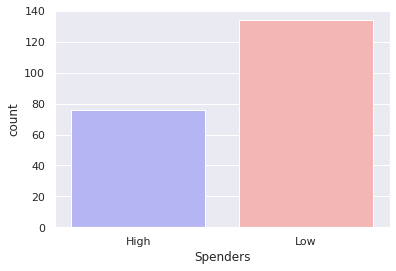

In [87]:
df['Spenders'] = np.where(df['Health_exp_pct_GDP_2016'] > df['Health_exp_pct_GDP_2016'].mean(), 'High','Low')
sns.countplot(x = "Spenders", data=df, palette="bwr")
plt.show

**We visualize our predicted vs actual data for the GDP**

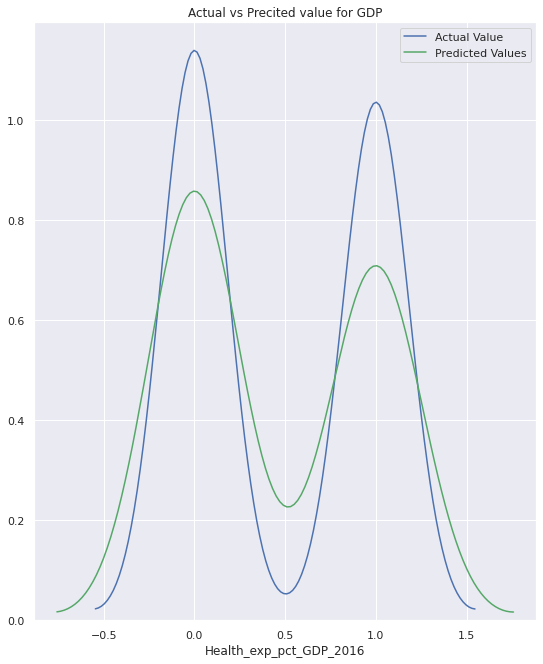

In [78]:
plt.figure(figsize=(9, 11))
ax = sns.distplot(categorizedGDP_df['Health_exp_pct_GDP_2016'], hist=False, color="b", label="Actual Value")
sns.distplot(y_pred, hist=False, color="g", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for GDP')
plt.show()
plt.close()